# Assignment 2 : Computational Cognitive Science
### Feature Integration Theory (Triesman Simluation) with Gabor Filters

We will be assuming that the scale and the orientation of shapes are fixed.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time 
import numpy as np
plt.rcParams.update({'font.size': 12})

### Defining Gabor Filter Banks

In [2]:
def get_sqr_filter():
    '''
    Defining the Square filters for four edges
    
    returns an array of filters
    '''
    filters = []
    kern = cv2.getGaborKernel((5,5), 1.0, np.pi/2, np.pi/2, 0.01, -np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # bottom
    kern = cv2.getGaborKernel((5,5), 1.0, np.pi/2, -np.pi/2, 0.01, -np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # top
    kern = cv2.getGaborKernel((5,5), 1.0, 0*np.pi/2, -np.pi/2, 0.01, -np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # right
    kern = cv2.getGaborKernel((5,5), 1.0, 0*np.pi/2, np.pi/2, 0.01, -np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # left 
    
    return filters

In [3]:
def get_tri_filter():
    '''
    Defining the Triangle filters for four edges
    
    returns an array of filters
    '''
    filters = []
    kern = cv2.getGaborKernel((5,5), 1.0, 1*np.pi/6, 2*np.pi, 0.01, -np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # left
    kern = cv2.getGaborKernel((5,5), 1.0, 5*np.pi/6, 2*np.pi, 0.01, -np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # right
    kern = cv2.getGaborKernel((5,5), 1.0, np.pi/2, -np.pi/2, 0.01, np.pi/2, ktype=cv2.CV_32F)
    filters.append(kern) # bottom 
    
    return filters

### Classification using net mean to edge distances

We notice that sqaure will have similar distances from 4 edges and so we are checking distance of thresolded filtered image means from net mean. Similarly in triangle we will use three filters and compare the distances. 

> Note : This method is position(translation) invariant but not scale and orientation for doing that we will need to somehow get orientation using gradients and scale by finding the local maxima in the scale space.


In [4]:
def classify_sqr(img, plot = False):
    '''
    Classification method for Square 
    i.e : Checks if the image has a square
    
    return boolean result, color detected. color result is only valid if its a square
    '''
    
    filters = get_sqr_filter()
    fimgs = []
    means = []
    threshs = []
    
    for i in range(len(filters)):
        
        fimg = cv2.filter2D(img, cv2.CV_8UC3, filters[i])
        thresh = (np.mean(fimg, axis =2) > 70)*255
        mean = np.stack(np.where(thresh==255)).mean(axis =1)
        
        fimgs.append(fimg)
        means.append(mean)
        threshs.append(thresh)
        
    x = (means[0]+means[1]+means[2]+means[3])/4
    temp1=np.linalg.norm(x-means[0],2) # top
    temp2=np.linalg.norm(x-means[1],2) # bottom
    temp3=np.linalg.norm(x-means[2],2) # right
    temp4=np.linalg.norm(x-means[3],2) # left
    
    colors = ['Red', 'Green', 'Blue']
    color_id = np.argmax(img[int(x[0]),int(x[1]),:])
    color = colors[color_id]
    
    
    
    if(plot):
        fig, ax = plt.subplots(2,6, figsize = [12,4])
        ax[0][0].imshow(filters[0],cmap = 'gray')
        ax[0][0].set_title("Filters used")
        ax[0][1].imshow(filters[1],cmap = 'gray')
        ax[1][0].imshow(filters[2],cmap = 'gray')
        ax[1][1].imshow(filters[3],cmap = 'gray')
        
        ax[0][2].imshow(threshs[0],cmap = 'gray')
        ax[0][2].set_title("Thresolded Image")
        ax[0][3].imshow(threshs[1],cmap = 'gray')
        ax[1][2].imshow(threshs[2],cmap = 'gray')
        ax[1][3].imshow(threshs[3],cmap = 'gray')
        
        ax[0][4].imshow(fimgs[0],cmap = 'gray')
        ax[0][4].set_title("Filtered Image")
        ax[0][5].imshow(fimgs[1],cmap = 'gray')
        ax[1][4].imshow(fimgs[2],cmap = 'gray')
        ax[1][5].imshow(fimgs[3],cmap = 'gray')
        
        
        if(abs((temp1/temp2)-1) < 0.1 and abs((temp3/temp4)-1) < 0.1):
            print("Yes ! It's a Square :) with",color,"Color")
            plt.savefig("Filtered Result Sqaure.png")
            
            return 1, color_id
        else:
            print("No ! It's not a Square :(") 
            return 0, color_id
        
    if(abs((temp1/temp2)-1) < 0.1 and abs((temp3/temp4)-1) < 0.1):
        return 1, color_id
    else:
        return 0, color_id

In [5]:
def classify_tri(img, plot = False):
    '''
    Classification method for Triangle 
    i.e : Checks if the image has a triangle
    
    return boolean result, color detected. color result is only valid if its a square
    '''
    filters = get_tri_filter()
    fimgs = []
    means = []
    threshs = []
    
    for i in range(len(filters)):
        
        fimg = cv2.filter2D(img, cv2.CV_8UC3, filters[i])
        thresh = (np.mean(fimg, axis =2) > 70)*255
        mean = np.stack(np.where(thresh==255)).mean(axis =1)
        
        fimgs.append(fimg)
        means.append(mean)
        threshs.append(thresh)
        
    x = (means[0]+means[1]+means[2])/3
    temp1=np.linalg.norm(x-means[0],2) # left
    temp2=np.linalg.norm(x-means[1],2) # right
    temp3=np.linalg.norm(x-means[2],2) # bottom
    
    colors = ['Red', 'Green', 'Blue']
    color_id = np.argmax(img[int(x[0]),int(x[1]),:])
    color = colors[color_id]
    
    
    ## This part is just for plotting and better visulaizations....
    if(plot):
        fig, ax = plt.subplots(2,6, figsize = [12,4])
        ax[0][0].imshow(filters[0],cmap = 'gray')
        ax[0][0].set_title("Filters used")
        ax[0][1].imshow(filters[1],cmap = 'gray')
        ax[1][0].imshow(filters[2],cmap = 'gray')
        
        ax[0][2].imshow(threshs[0],cmap = 'gray')
        ax[0][2].set_title("Thresholded Images")
        ax[0][3].imshow(threshs[1],cmap = 'gray')
        ax[1][2].imshow(threshs[2],cmap = 'gray')
        
        ax[0][4].imshow(fimgs[0],cmap = 'gray')
        ax[0][4].set_title("Filtered Images")
        ax[0][5].imshow(fimgs[1],cmap = 'gray')
        ax[1][4].imshow(fimgs[2],cmap = 'gray')
        
        
        
        if(abs((temp1/temp2)-1) < 0.1 and abs((temp2/temp3)-1) < 0.1 and abs((temp3/temp1)-1) < 0.1):
            print("Yes ! It's a Triangle :) with",color,"Color")
            plt.savefig("Filtered Result Triangle.png")
            
            return 1, color_id
        else:
            print("No ! It's not a Triangle :(") 
            return 0, color_id
        
    if(abs((temp1/temp2)-1) < 0.1 and abs((temp2/temp3)-1) < 0.1 and abs((temp3/temp1)-1) < 0.1):
        return 1, color_id
    else:
        return 0, color_id

## Q1. Test for Shape detection 

We will be detecting the shapes and color of the images in below few lines


### Trianlge Detection

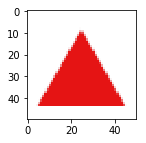

In [6]:
# Importing a triangle image
# Note : the image should contain only one image and should have a size of 50, 50 for it tbe effective
img = cv2.cvtColor(cv2.imread('tri_red.png'),cv2.COLOR_BGR2RGB) # replace with any image of your preference
fig = plt.figure(figsize = (2,2))
plt.imshow(img)
plt.show()

Yes ! It's a Triangle :) with Red Color


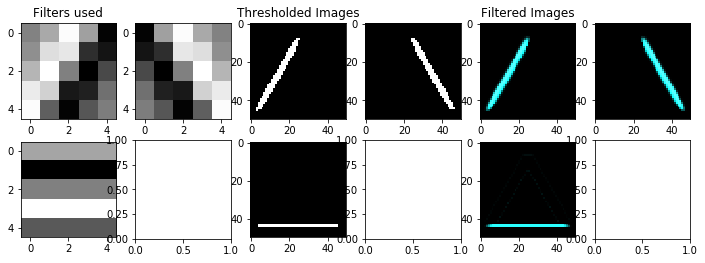

In [7]:
shape, color = classify_tri(img, plot = True)

No ! It's not a Square :(


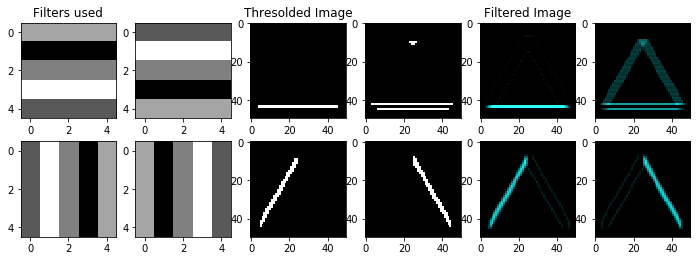

In [8]:
shape, color = classify_sqr(img, plot = True)

As you have seen that the filters are detecting edges of each orientation and domain knowledge about the shapes help us classify them as triangle, same can be done for the square look below.

### Square Detection

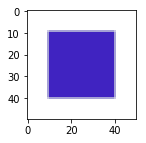

In [9]:
# Importing a triangle image
# Note : the image should contain only one image and should have a size of 50, 50 for it tbe effective
img = cv2.cvtColor(cv2.imread('sqr_blue.png'),cv2.COLOR_BGR2RGB) # replace with any image of your preference
fig = plt.figure(figsize = (2,2))
plt.imshow(img)
plt.show()

No ! It's not a Triangle :(


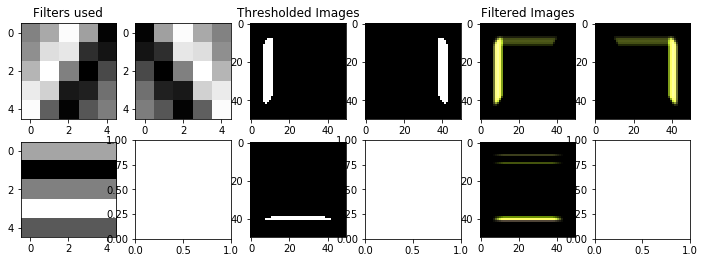

In [10]:
shape, color = classify_tri(img, plot = True)

Yes ! It's a Square :) with Blue Color


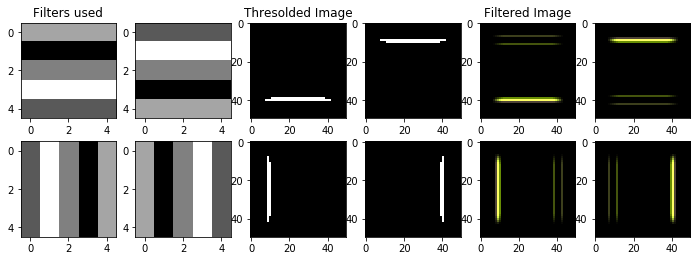

In [11]:
shape, color = classify_sqr(img, plot = True)

Moving towards the feature integration theory we will need a image containing multiple instance of traingles and squares with different colors

## Q2. Obtaining Image frames with shape and color

#### Generation of a image cotaining multiple traingles and squares with different colors.

In [12]:
# Defining the color values and shape values variables for ease of coding..
RED = 1
BLU = 0
GRN = -1
ccode = [RED, GRN, BLU]
SQR = 0
TRI = 1
OTR = -1

### The random test case generation funtion......

Below function generates a random image based on test for which you want to generate the image using a configuration

In [13]:
def gen_random_image(dims = 500, n_objects = 10, config = None):
    '''
    Config file is require to define the type of test image to be generated
    '''
    if(config is None):
        config = {
            "type_gen" : "feature", # type of search for which test case is generated
            "fs_const" : "color", # what feature to keep constant accross non odd images
            "odd_color" : RED, # Color of odd image
            "odd_shape" : TRI # Shape of odd image
        }
    
    # Loading Images..................................
    sqr_blue = cv2.cvtColor(cv2.imread('sqr_blue.png'),cv2.COLOR_BGR2RGB)
    sqr_red = cv2.cvtColor(cv2.imread('sqr_red.png'),cv2.COLOR_BGR2RGB)
    tri_blue = cv2.cvtColor(cv2.imread('tri_blue.png'),cv2.COLOR_BGR2RGB)
    tri_red = cv2.cvtColor(cv2.imread('tri_red.png'),cv2.COLOR_BGR2RGB)
    
    images = [[sqr_blue, sqr_red], [tri_blue, tri_red]]
    img_dim = 50
    
    C_cells = int(dims/img_dim)
    R_cells = int(dims/img_dim)
    
    N_cells = C_cells*R_cells
    
    # Initializing the grid ....................
    Grid = (np.zeros((dims,dims,3))+255).astype(np.uint8)
    
    # Selecting the patches to be filled...............
    choices = np.random.choice(np.arange(N_cells), n_objects, replace=False)
    
    if(config["type_gen"] == "feature"):
        odd_img = images[config["odd_shape"]][config["odd_color"]]
        if(config["fs_const"] == "color"):
            even_img = images[1-config["odd_shape"]][config["odd_color"]]
        else:
            even_img = images[config["odd_shape"]][1-config["odd_color"]]
            
        for k in range(choices.shape[0]):
            choice = choices[k]
            i = int(choice//R_cells)*img_dim
            j = int(choice%C_cells)*img_dim
            
            if(k != choices.shape[0]-1):
                Grid[i:i+img_dim, j:j+img_dim] = even_img
            else:
                Grid[i:i+img_dim, j:j+img_dim] = odd_img
                
    if(config["type_gen"] == "conjunction"):
        odd_img = images[config["odd_shape"]][config["odd_color"]]
        if(config["fs_const"] == "shape"):
            even_img = [
                images[1-config["odd_shape"]][config["odd_color"]], 
                images[config["odd_shape"]][1-config["odd_color"]]
            ]
        elif(config["fs_const"] == "color"):
            even_img = [
                images[config["odd_shape"]][1-config["odd_color"]],
                images[1-config["odd_shape"]][config["odd_color"]]
            ]
        else:
            even_img = [
                images[config["odd_shape"]][1-config["odd_color"]],
                images[1-config["odd_shape"]][1-config["odd_color"]],
                images[1-config["odd_shape"]][config["odd_color"]]
            ]
            
        
            
        for k in range(choices.shape[0]):
            choice = choices[k]
            i = int(choice//R_cells)*img_dim
            j = int(choice%C_cells)*img_dim
            
            if(k != choices.shape[0]-1):
                Grid[i:i+img_dim, j:j+img_dim] = even_img[np.random.choice(np.arange(len(even_img)))]
            else:
                Grid[i:i+img_dim, j:j+img_dim] = odd_img
        
    return Grid

In [14]:
# Defining the odd image triesman seach configurations for feature based and conjunction based...
config1 = {
            "type_gen" : "feature", # type of search for which test case is generated
            "fs_const" : "color", # what feature to keep constant accross non odd images
            "odd_color" : BLU, # Color of odd image
            "odd_shape" : SQR # Shape of odd image
        }
config2 = {
            "type_gen" : "conjunction", # type of search for which test case is generated
            "fs_const" : "shape", # what feature to keep constant accross non odd images
            "odd_color" : RED, # Color of odd image
            "odd_shape" : SQR # Shape of odd image
        }

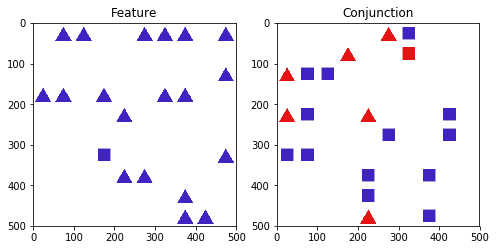

In [15]:
# Generating the image examples .....
fig, ax = plt.subplots(1,2, figsize=[8,4])
img = gen_random_image(dims = 500, n_objects = 20, config = config1)
ax[0].imshow(img)
ax[0].set_title("Feature")
img = gen_random_image(dims = 500, n_objects = 20, config = config2)
ax[1].imshow(img)
ax[1].set_title("Conjunction")
plt.savefig("Generated Image.png")
plt.show()

### Defining the feature grids generating function......

The Below function generates the grids of color maps and the shape maps of a given test image. 

In [16]:
def get_grids(img, config = None):
    
    N_cells = img.shape[0]//50
    shape_grid = np.ones((N_cells, N_cells))*OTR
    color_grid = np.ones((N_cells, N_cells))*OTR
    
    for i in range(N_cells):
        for j in range(N_cells):
            sub_img = img[i*50:i*50+50, j*50:j*50+50]
            if(sub_img.mean()-255 > -5):
                pass
            else:
                shape, color = classify_sqr(sub_img, plot=False)
                if(shape == 1):
                    shape_grid[i,j] = SQR
                    color_grid[i,j] = ccode[color]
                else:
                    pass
                
                shape, color = classify_tri(sub_img, plot=False)
                if(shape == 1):
                    shape_grid[i,j] = TRI
                    color_grid[i,j] = ccode[color]
                else:
                    pass    
                
    return color_grid, shape_grid    

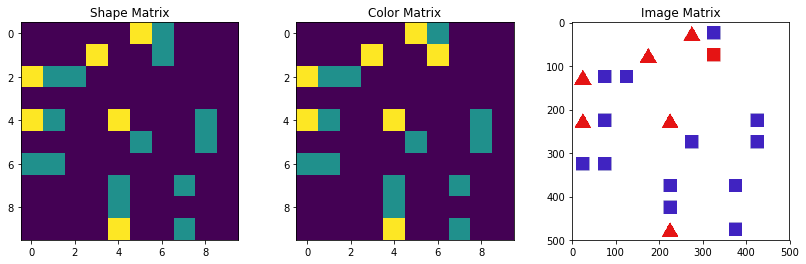

In [17]:
## Finding the grid results ....
c_grid, s_grid = get_grids(img)
fig, ax = plt.subplots(1,3 , figsize = [14,4])
ax[0].imshow(s_grid)
ax[0].set_title("Shape Matrix")
ax[1].imshow(c_grid)
ax[1].set_title("Color Matrix")
ax[2].imshow(img)
ax[2].set_title("Image Matrix")
plt.savefig("Feature Maps.png")
plt.show()

## Q3. Defining the Feature Integration Method to detect the Odd frame

### Defining the searching function ....

The basic idea we use here is after getting the attention maps we only need to look for one property in feature search whereas we look for two properties simultaneously in the conjucntion search. We have delayed until information from all relevant stores has been retrieved

In [37]:
def search_odd_loc(c_grid, s_grid):

    '''
    Searches whole image for odd image based on feature or conjuction search 
    returns : location of the grid cell that contains the odd image
    '''
    
    dim_r = c_grid.shape[0]
    dim_c = c_grid.shape[1]
    
    seq = np.where((c_grid != GRN)*(s_grid != OTR))
    
    if(seq[0].shape[0]==0):
        return
    
    start_time = time.time()
    ##### trying Feature Search first...........
    # RED, BLUE, SQR, TRI
    locs = [[0,0],[0,0],[0,0],[0,0]] 
    flags = [True, True, True, True] 
    counts = [0,0,0,0]
        
    for k in range(seq[0].shape[0]):
        i = seq[0][k]
        j = seq[1][k]

        if(flags[0]):
            if(c_grid[i,j] == RED):

                counts[0] += 1
                if(counts[0] > 1):
                    flags[0] = False
                elif(counts[0] == 1):
                    locs[0] = [i,j]

        if(flags[1]):
            if(c_grid[i,j] == BLU):

                counts[1] += 1
                if(counts[1] > 1):
                    flags[1] = False
                elif(counts[1] == 1):
                    locs[1] = [i,j]


        if(flags[2]):
            if(s_grid[i,j] == SQR):

                counts[2] += 1
                if(counts[2] > 1):
                    flags[2] = False
                elif(counts[2] == 1):
                    locs[2] = [i,j]


        if(flags[3]):
            if(s_grid[i,j] == TRI):

                counts[3] += 1
                if(counts[3] > 1):
                    flags[3] = False
                elif(counts[3] == 1):
                    locs[3] = [i,j]
    map_feat = np.where((np.array(counts)==1)*(np.array(flags)==True))
    if(map_feat[0].shape[0]!= 0):
        ret_time = time.time()-start_time
        return locs[map_feat[0][0]], ret_time
    else:
        pass
    
    #### Feature Search did not work reseted the time and starting the conjucntion search.........
    # RED, BLUE, SQR, TRI
    locs = [[0,0],[0,0],[0,0],[0,0]] 
    flags = [True, True, True, True] 
    counts = [0,0,0,0]
    
    for k in range(seq[0].shape[0]):
        i = seq[0][k]
        j = seq[1][k]
        if(flags[0]):
            time.sleep(0.000001)
            if((c_grid[i,j] == RED)*(s_grid[i,j] == SQR)):
                counts[0] += 1
                if(counts[0] > 1):
                    flags[0] = False
                elif(counts[0] == 1):
                    locs[0] = [i,j]

        if(flags[1]):
            time.sleep(0.000001)
            if((c_grid[i,j] == BLU)*(s_grid[i,j] == SQR)):
                locs[1] = [i,j]
                counts[1] += 1
                if(counts[1] > 1):
                    flags[1] = False
                elif(counts[1] == 1):
                    locs[1] = [i,j]


        if(flags[2]):
            time.sleep(0.000001)
            if((s_grid[i,j] == TRI)*(c_grid[i,j] == RED)):
                counts[2] += 1
                if(counts[2] > 1):
                    flags[2] = False
                elif(counts[2] == 1):
                    locs[2] = [i,j]


        if(flags[3]):
            time.sleep(0.000001)
            if((s_grid[i,j] == TRI)*(c_grid[i,j] == BLU)):
                counts[3] += 1
                if(counts[3] > 1):
                    flags[3] = False
                elif(counts[3] == 1):
                    locs[3] = [i,j]

    map_conj = np.where((np.array(counts)==1)*(np.array(flags)==True))
    if(map_conj[0].shape[0]!= 0):
        ret_time = time.time()-start_time
        return locs[map_conj[0][0]], ret_time
    else:
        pass
    
    return [0,0]

### Putting it all Together :: Combination of small pieces leads to big wonders

We now have all the pieces to put togeather and make a working model.
We are now going to define a function that takes a image and search time as parameters and returns time taken, location of odd image as output.

> **NOTE** :: We have assumed 
</br>
>**Definition of Odd Image** : Has only one instance in whole image. 

In [38]:
def find_odd(img , ret_mod = True):
    
    '''
    Takes image and type to return location and the time taken for odd search
    ret_mod : True if you want modified image in output with framed output image
    '''
    
    c_grid, s_grid = get_grids(img)
    
    loc_odd, ret_time = search_odd_loc(c_grid, s_grid)
    
    if(loc_odd is None):
        return None, None, None
    
    
    loc_ret = [loc_odd[0]*50,loc_odd[1]*50]
    if(ret_mod):
        sub_img = img[loc_odd[0]*50:loc_odd[0]*50+50,loc_odd[1]*50:loc_odd[1]*50+50]
        sub_img[0:5,:,:] = 0
        sub_img[-5:,:,:] = 0
        sub_img[:,-5:,:] = 0
        sub_img[:,0:5,:] = 0
        img[loc_odd[0]*50:loc_odd[0]*50+50,loc_odd[1]*50:loc_odd[1]*50+50] = sub_img
        
        return ret_time, loc_ret, img
    else:
        return ret_time, loc_ret, None

In [39]:
# Defining the odd image triesman seach configuration
config = {
            "type_gen" : "conjunction",
            "fs_const" : "color",
            "odd_color" : BLU,
            "odd_shape" : SQR,
        }

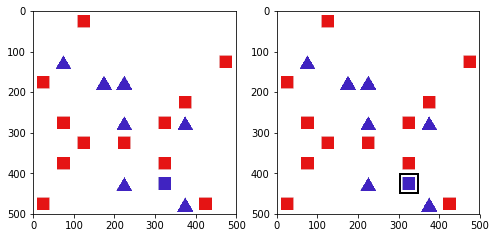

In [40]:
# Generating the image with given config.....
fig, ax  = plt.subplots(1,2, figsize = [8,4])
img = gen_random_image(dims = 500, n_objects = 20, config = config)
ax[0].imshow(img)
net_time, loc, img_mod = find_odd(img.copy() , ret_mod = True)
ax[1].imshow(img_mod)
plt.savefig("Framed Odd Image.png")
plt.show()

## Visulaizing response time vs Numbers of objects

Here we can see the different behaviours we see in conjuction vs feature based search.
This may take some time depending on size and number of steps you have given why don't you drink tea mean whille :).

In [41]:
time_ft = []
time_cn = []
iters = 35
dim_max = 500
step = 2
for i in range(1,iters):
    config = {
            "type_gen" : "conjunction",
            "fs_const" : "shape",
            "odd_color" : RED,
            "odd_shape" : TRI,
    }
    img = gen_random_image(dims = dim_max, n_objects = (i)*step, config = config)
#     plt.imshow(img)
#     plt.show()
    net_time, loc, _ = find_odd(img, ret_mod = False)
    time_cn.append(net_time)
    config = {
            "type_gen" : "feature",
            "fs_const" : "color",
            "odd_color" : BLU,
            "odd_shape" : SQR,
    }
    img = gen_random_image(dims = dim_max, n_objects = (i)*step, config = config)  
    net_time, loc, _ = find_odd(img, ret_mod = False)
    time_ft.append(net_time)

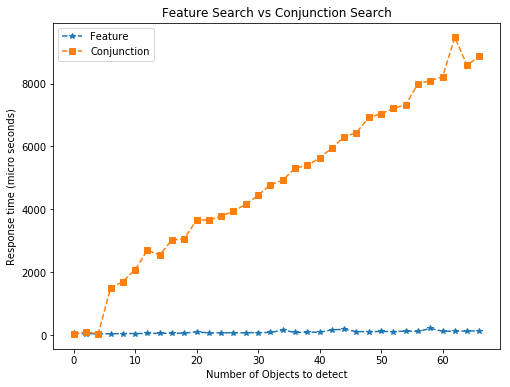

In [42]:
fig = plt.figure(figsize = [8,6])
plt.plot(np.arange(0,len(time_ft)*step, step),np.array(time_ft)*1000000,'--*', label = "Feature")
plt.plot(np.arange(0,len(time_cn)*step, step),np.array(time_cn)*1000000,'--s', label = "Conjunction")
plt.legend()
plt.title("Feature Search vs Conjunction Search")
plt.xlabel("Number of Objects to detect")
plt.ylabel("Response time (micro seconds)")
plt.savefig("FeatvsConj.png")
plt.show()

We Conclude by saying that the image time responses are as expected for conjuction vs feature based search.

## Thankyou by

#### Abhishek Kumar, Niharika Ahuja

18111002, 18111045